In [1]:
# preprocessing
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import datasets
from tensorflow.keras.backend import expand_dims
from tensorflow.keras.utils import to_categorical

# CNN
from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras.callbacks import EarlyStopping

2024-06-06 13:55:53.459377: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-06-06 13:55:53.721766: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2024-06-06 13:55:53.721808: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2024-06-06 13:55:53.760737: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-06-06 13:55:54.618055: W tensorflow/stream_executor/platform/de

# Load data

In [2]:
(X_train, y_train), (X_test, y_test) = datasets.fashion_mnist.load_data()
(X_train.shape, y_train.shape), (X_test.shape, y_test.shape)

(((60000, 28, 28), (60000,)), ((10000, 28, 28), (10000,)))

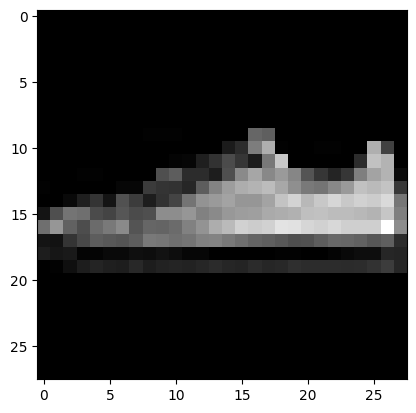

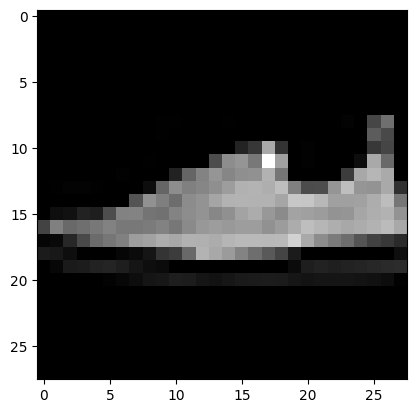

In [3]:
# let's look at some random samples of the data
number_of_train_images = len(X_train)
random_list_of_images_to_show = np.random.randint(0, number_of_train_images , 2)

for i in random_list_of_images_to_show:
    plt.imshow(X_train[i], cmap='gray')
    plt.show()

# Preprocessing

## Normalize

In [4]:
# scale all pixel intensities to 0-1
X_train = X_train/255
X_test = X_test/255

In [5]:
(X_train.min(), X_train.max()), (X_test.min(), X_test.max())

((0.0, 1.0), (0.0, 1.0))

## Expand dimensions

In [6]:
# reshape tensors to add a single channel for black and white pixels
X_train = expand_dims(X_train, axis = -1)
X_test = expand_dims(X_test, axis = -1)

2024-06-06 13:55:56.911423: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2024-06-06 13:55:56.911505: W tensorflow/stream_executor/cuda/cuda_driver.cc:263] failed call to cuInit: UNKNOWN ERROR (303)
2024-06-06 13:55:56.911536: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (Jasmine): /proc/driver/nvidia/version does not exist
2024-06-06 13:55:56.912124: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-06-06 13:55:56.918539: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 376320000 exceeds 1

In [7]:
X_train.shape, X_test.shape

(TensorShape([60000, 28, 28, 1]), TensorShape([10000, 28, 28, 1]))

## Encode target

In [8]:
# one-hot-encode the clothing labels
y_train_cat = to_categorical(y_train, num_classes=10)
y_test_cat = to_categorical(y_test, num_classes=10)

In [9]:
y_train_cat.shape, y_test_cat.shape

((60000, 10), (10000, 10))

# CNN

In [10]:
def initalize_model():
    
    model = models.Sequential()
    
    # convolutional and maxpooling layers
    model.add(layers.Conv2D(8, (4,4), input_shape=(28,28,1), activation="relu", padding="same"))
    model.add(layers.MaxPool2D(pool_size=(2,2)))
    
    # flattening layer
    model.add(layers.Flatten())
    
    # classification layer
    model.add(layers.Dense(10, activation="softmax"))
    
    # model compilation
    model.compile(loss="categorical_crossentropy",
                 optimizer="adam",
                 metrics=["accuracy"])
    
    return model

In [11]:
model = initalize_model()

es = EarlyStopping(patience=5)

history = model.fit(X_train, 
                   y_train_cat, 
                   validation_split=0.3,
                   batch_size=32,
                   epochs=100,
                   callbacks= es, 
                   verbose=1)

Epoch 1/100
1313/1313 [==============================] - 15s 11ms/step - loss: 0.5487 - accuracy: 0.8075 - val_loss: 0.4778 - val_accuracy: 0.8297
Epoch 2/100
1313/1313 [==============================] - 14s 10ms/step - loss: 0.3982 - accuracy: 0.8614 - val_loss: 0.3758 - val_accuracy: 0.8688
Epoch 3/100
1313/1313 [==============================] - 14s 10ms/step - loss: 0.3604 - accuracy: 0.8745 - val_loss: 0.3629 - val_accuracy: 0.8724
Epoch 4/100
1313/1313 [==============================] - 14s 11ms/step - loss: 0.3376 - accuracy: 0.8802 - val_loss: 0.3720 - val_accuracy: 0.8698
Epoch 5/100
1313/1313 [==============================] - 18s 14ms/step - loss: 0.3199 - accuracy: 0.8859 - val_loss: 0.3392 - val_accuracy: 0.8813
Epoch 6/100
1313/1313 [==============================] - 14s 11ms/step - loss: 0.3049 - accuracy: 0.8926 - val_loss: 0.3286 - val_accuracy: 0.8851
Epoch 7/100
1313/1313 [==============================] - 14s 11ms/step - loss: 0.2935 - accuracy: 0.8954 - val_loss: 0

## Evaluate performance

In [12]:
res = model.evaluate(X_test, y_test_cat, verbose=1)

313/313 [==============================] - 2s 5ms/step - loss: 0.3186 - accuracy: 0.8918
